<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>3</code><b>

<b>Group Members:</b>  

1. <code> Sujahid Basha - B00925849</code>
2. <code> Hariesh Annadevara Sivakumar - B00965733</code>
3. <code> Venkatraman M - B00968227</code>
4. <code> Shubhangi Mahato - B00975934</code>


# 1. Dataset Information 

<h4> Dataset Name: <code> Human Activity Recognition with Smartphones</code></h4>
<h4> Link to the Dataset: <code>https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones</code>
<h4> Dataset Description: </h4> 
<code>
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.
</code>

<h4> Attribute information: </h4><code>
For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

Triaxial Angular velocity from the gyroscope.

A 561-feature vector with time and frequency domain variables.

Its activity label.
An identifier of the subject who carried out the experiment.</code>


# 2. Task Information 

<h4> Task Goal :</h4> <code> This Task aims to recognize human activities using machine learning techniques using various ML Algorithms.</code>
<h4> Task Description: </h4>
    <code>The dataset used for this project is the Human Activity Recognition dataset, which contains data collected from the accelerometer and gyroscope of a smartphone. The project involves preprocessing the data, training various machine learning models, and evaluating their performance. The models used include Logistic Regression, Random Forest, Support Vector Machine (SVM), and Naive Bayes with following features:
    tBodyAcc-mean()-X,	tBodyAcc-mean()-Y,	tBodyAcc-mean()-Z,	tBodyAcc-std()-X,	tBodyAcc-std()-Y,	tBodyAcc-std()-Z,	tBodyAcc-mad()-X,	tBodyAcc-mad()-Y,	tBodyAcc-mad()-Z,	tBodyAcc-max()-X,	tBodyAcc-max()-Y,	tBodyAcc-max()-Z,	tBodyAcc-min()-X,	tBodyAcc-min()-Y,	tBodyAcc-min()-Z, and similar 545 features	</code>

# 3. Task Implementation: Coding

In [2]:
from sklearn.utils import shuffle
import pandas as pd

train = shuffle(pd.read_csv("archive-3/train.csv"))
test = shuffle(pd.read_csv("archive-3/test.csv"))

print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



### 3.1 Preprocessing 

In [4]:
## your code. make as many cells as you need. Retain the outputs of each cell
train_outcome = pd.crosstab(index=train["Activity"], 
                              columns="count")   

3.2 **EDA**

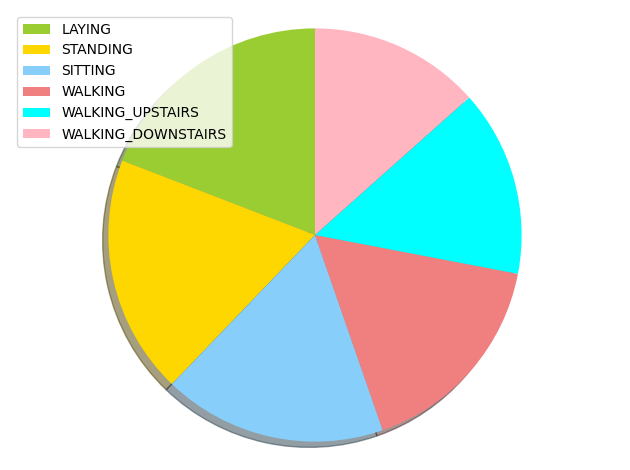

In [5]:
### Distribution of data
import matplotlib.pyplot as plt 

temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

**Normalize the Predictor(Feature Set) for  training**

In [6]:

X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)


print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")


from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()


# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Number of numeric features: 561


Hyperparameter tuning using grid search and cross validation

In [7]:
# Creating the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

### 3.3 Model development and training: 
    Training SVM model using radial kernel

In [8]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC


# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

### 3.3.1 Model evaluation - SVM

Best score for training data: 0.9863989973963753 

Best C: 100 

Best Kernel: rbf 

Best Gamma: 0.001 



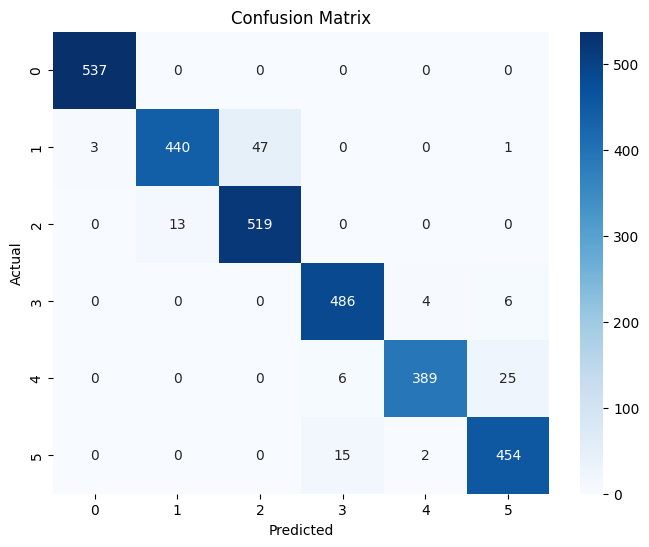

SVM Classifier Metrics:
Accuracy: 0.9586019681031558
Precision: 0.9595565012835043
Recall: 0.9586019681031558
F1 Score: 0.9584769332660036
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       537
           1       0.97      0.90      0.93       491
           2       0.92      0.98      0.95       532
           3       0.96      0.98      0.97       496
           4       0.98      0.93      0.95       420
           5       0.93      0.96      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

In [9]:
# the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(Y_test, Y_pred)


precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')


classification_rep = classification_report(Y_test, Y_pred)


conf_matrix = confusion_matrix(Y_test, Y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


accuracy_svm = accuracy
precision_svm = precision
recall_svm = recall
f1_svm = f1


print("Classification Report:\n", classification_rep)


svm_model.score

### 3.3.2 Model development and training: 
    Training Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


rf_model = RandomForestClassifier(n_estimators=100)


rf_model.fit(X_train_scaled, Y_train_label)


Y_pred_rf = rf_model.predict(X_test_scaled)
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)
Y_pred_rf = encoder.transform(Y_pred_rf)




### 3.3.1 Model evaluation - RandomForest

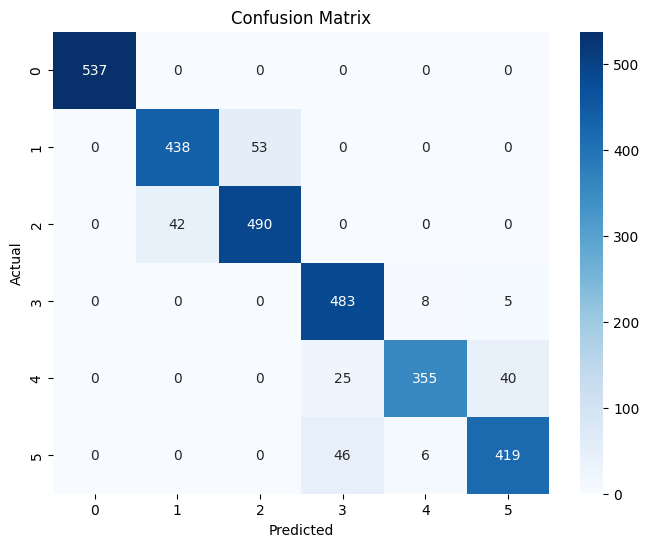

Accuracy: 0.9236511706820495
Precision: 0.9253242413171013
Recall: 0.9236511706820495
F1 Score: 0.9234311530104656
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.89      0.90       491
           2       0.90      0.92      0.91       532
           3       0.87      0.97      0.92       496
           4       0.96      0.85      0.90       420
           5       0.90      0.89      0.90       471

    accuracy                           0.92      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947



In [11]:
accuracy = accuracy_score(Y_test, Y_pred_rf)


precision = precision_score(Y_test, Y_pred_rf, average='weighted')
recall = recall_score(Y_test, Y_pred_rf, average='weighted')
f1 = f1_score(Y_test, Y_pred_rf, average='weighted')


classification_rep = classification_report(Y_test, Y_pred_rf)


conf_matrix = confusion_matrix(Y_test, Y_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy_random_forest = accuracy
precision_random_forest = precision
recall_random_forest = recall
f1_random_forest = f1


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


print("Classification Report:\n", classification_rep)

### 3.3.3 Model development and training: 
    Training Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()


logistic_model.fit(X_train_scaled, Y_train)


Y_pred_logistic = logistic_model.predict(X_test_scaled)




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.3.3 Model evaluation - Logistic Regression

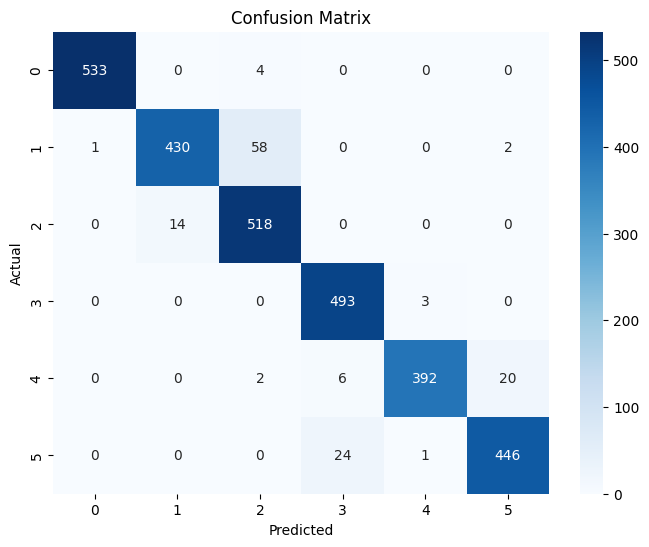

Accuracy: 0.9541907024092298
Precision: 0.9559470611177988
Recall: 0.9541907024092298
F1 Score: 0.954105851548435
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       537
           1       0.97      0.88      0.92       491
           2       0.89      0.97      0.93       532
           3       0.94      0.99      0.97       496
           4       0.99      0.93      0.96       420
           5       0.95      0.95      0.95       471

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.95      0.95      2947



In [13]:
accuracy = accuracy_score(Y_test, Y_pred_logistic)


precision = precision_score(Y_test, Y_pred_logistic, average='weighted')
recall = recall_score(Y_test, Y_pred_logistic, average='weighted')
f1 = f1_score(Y_test, Y_pred_logistic, average='weighted')


classification_rep = classification_report(Y_test, Y_pred_logistic)


conf_matrix = confusion_matrix(Y_test, Y_pred_logistic)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy_logistic = accuracy
precision_logistic = precision
recall_logistic = recall
f1_logistic = f1


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


print("Classification Report:\n", classification_rep)

### 3.3.4 Model development and training: 
    Training Naive bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()


naive_bayes_model.fit(X_train_scaled, Y_train)


Y_pred_naive_bayes = naive_bayes_model.predict(X_test_scaled)




### 3.3.3 Model evaluation - Naive Bayes

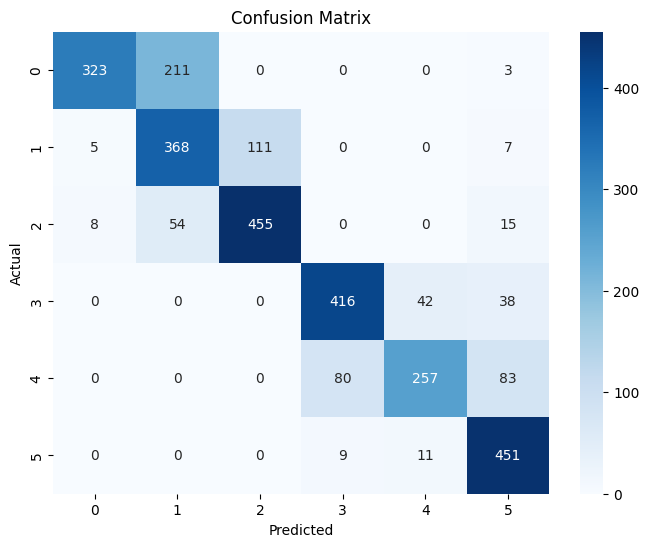

naive_bayes Classifier Metrics:
Accuracy: 0.7702748557855447
Precision: 0.7946833707399261
Recall: 0.7702748557855447
F1 Score: 0.7687700182193763
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.60      0.74       537
           1       0.58      0.75      0.65       491
           2       0.80      0.86      0.83       532
           3       0.82      0.84      0.83       496
           4       0.83      0.61      0.70       420
           5       0.76      0.96      0.84       471

    accuracy                           0.77      2947
   macro avg       0.79      0.77      0.77      2947
weighted avg       0.79      0.77      0.77      2947



In [15]:
accuracy = accuracy_score(Y_test, Y_pred_naive_bayes)


precision = precision_score(Y_test, Y_pred_naive_bayes, average='weighted')
recall = recall_score(Y_test, Y_pred_naive_bayes, average='weighted')
f1 = f1_score(Y_test, Y_pred_naive_bayes, average='weighted')


classification_rep = classification_report(Y_test, Y_pred_naive_bayes)


conf_matrix = confusion_matrix(Y_test, Y_pred_naive_bayes)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("naive_bayes Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


accuracy_naive_bayes = accuracy
precision_naive_bayes = precision
recall_naive_bayes = recall
f1_naive_bayes = f1


print("Classification Report:\n", classification_rep)

### 3.3.4.1 Model development and training: 
    Training Naive bayes with Hyper Parameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np


naive_bayes_model = GaussianNB()


var_smoothing = np.logspace(0,-9, num=100)
grid = {'var_smoothing': var_smoothing}


grid_search = GridSearchCV(estimator=naive_bayes_model, param_grid=grid, cv=5)


grid_search.fit(X_train_scaled, Y_train)


best_params = grid_search.best_params_

print("Best parameters: ", best_params)


naive_bayes_model = GaussianNB(var_smoothing=best_params['var_smoothing'])


naive_bayes_model.fit(X_train_scaled, Y_train)


Y_pred_naive_bayes = naive_bayes_model.predict(X_test_scaled)




Best parameters:  {'var_smoothing': 0.0023101297000831605}


### 3.3.4.1 Model evaluation - Naive Bayes after hyper parameter tuning

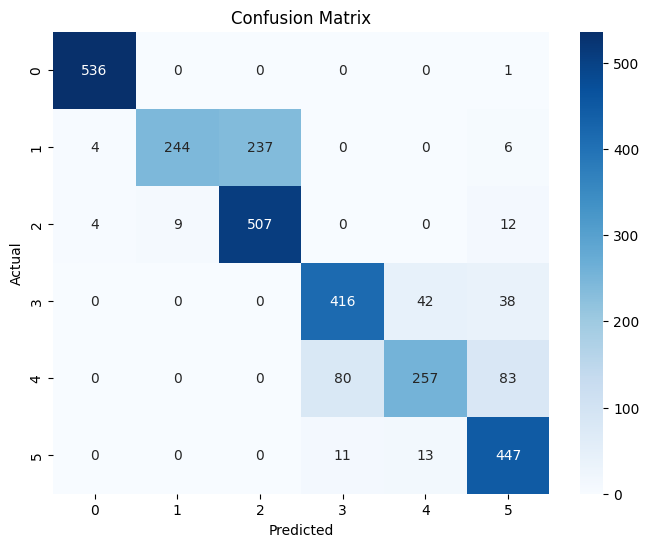

naive_bayes Classifier Metrics:
Accuracy: 0.8167628096369189
Precision: 0.8404380021453426
Recall: 0.8167628096369189
F1 Score: 0.8081757927854412
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       537
           1       0.96      0.50      0.66       491
           2       0.68      0.95      0.79       532
           3       0.82      0.84      0.83       496
           4       0.82      0.61      0.70       420
           5       0.76      0.95      0.84       471

    accuracy                           0.82      2947
   macro avg       0.84      0.81      0.80      2947
weighted avg       0.84      0.82      0.81      2947



In [18]:
accuracy = accuracy_score(Y_test, Y_pred_naive_bayes)
precision = precision_score(Y_test, Y_pred_naive_bayes, average='weighted')
recall = recall_score(Y_test, Y_pred_naive_bayes, average='weighted')
f1 = f1_score(Y_test, Y_pred_naive_bayes, average='weighted')


classification_rep = classification_report(Y_test, Y_pred_naive_bayes)


conf_matrix = confusion_matrix(Y_test, Y_pred_naive_bayes)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("naive_bayes Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

accuracy_naive_bayes_gs = accuracy
precision_naive_bayes_gs = precision
recall_naive_bayes_gs = recall
f1_naive_bayes_gs = f1



print("Classification Report:\n", classification_rep)

### 3.4 Analysis 

In [19]:
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes', "Naive Bayes-GridSearch"],
    'Accuracy': [accuracy_logistic, accuracy_random_forest, accuracy_svm, accuracy_naive_bayes,accuracy_naive_bayes_gs],
    'Precision': [precision_logistic, precision_random_forest, precision_svm, precision_naive_bayes,precision_naive_bayes_gs],
    'Recall': [recall_logistic, recall_random_forest, recall_svm, recall_naive_bayes,recall_naive_bayes_gs],
    'F1 Score': [f1_logistic, f1_random_forest, f1_svm, f1_naive_bayes,f1_naive_bayes_gs]
})
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.954191,0.955947,0.954191,0.954106
1,Random Forest,0.923651,0.925324,0.923651,0.923431
2,SVM,0.958602,0.959557,0.958602,0.958477
3,Naive Bayes,0.770275,0.794683,0.770275,0.768770
4,Naive Bayes-GridSearch,0.816763,0.840438,0.816763,0.808176


### 3.4.1 Analysis: 
<code>plotting Roc-Auc curve</code>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

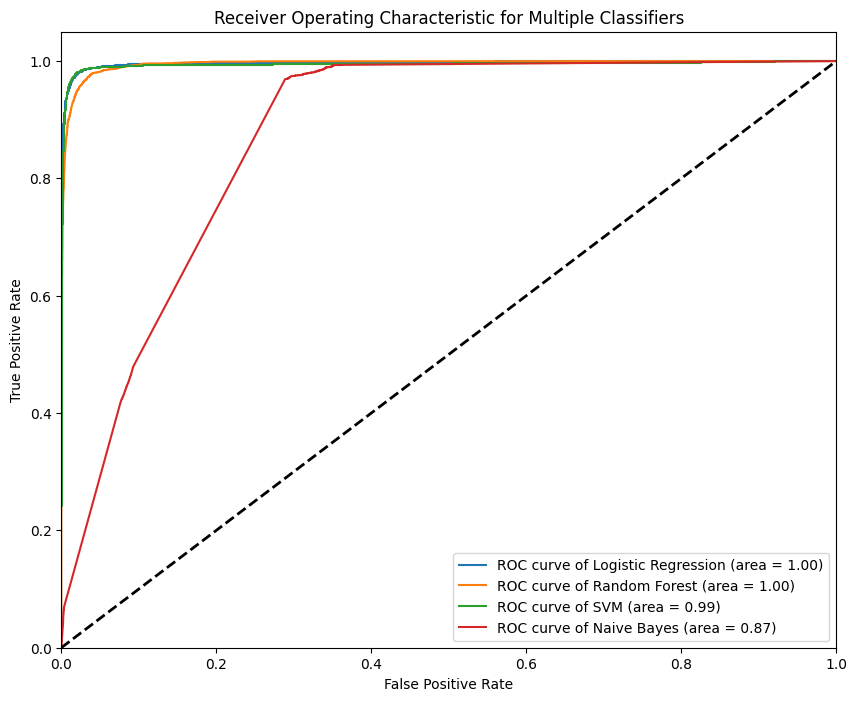

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np


Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_bin.shape[1]


classifiers = {
    'Logistic Regression': logistic_model,
    'Random Forest': rf_model,
    'SVM': final_model,
    'Naive Bayes': naive_bayes_model
}

plt.figure(figsize=(10, 8))


for (name, classifier) in classifiers.items():
    classifier = OneVsRestClassifier(classifier)
    classifier.fit(X_train_scaled, Y_train)
    try:
        Y_score = classifier.decision_function(X_test_scaled)
    except AttributeError:
        Y_score = classifier.predict_proba(X_test_scaled)

    
    Y_test_bin = np.nan_to_num(Y_test_bin, nan=np.nanmean(Y_test_bin))
    Y_score = np.nan_to_num(Y_score, nan=np.nanmean(Y_score))

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_bin.ravel(), Y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    
    plt.plot(fpr["micro"], tpr["micro"],
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(name, roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiple Classifiers')
plt.legend(loc="lower right")
plt.show()

- Logistic Regression (LF): An AUC-ROC of micor of 0.1 suggests that the Logistic Regression classifier has a 100% chance of correctly distinguishing between positive and negative classes. This is a high value, indicating good performance can also be termed to be overfitting.The actual prediction on the dataset <code>before</code> performing the <code>**OneVsRestClassifier**</code> the performance is <code>95%</code>.

- Random Forest (RF): An AUC-ROC of 1.0 suggests that the Random Forest classifier has a 100% chance of correctly distinguishing between positive and negative classes. This is the highest possible value, indicating perfect performance, can also be termed to be overFitting.The actual prediction on the dataset <code>before</code> performing the <code>"OneVsRestClassifier"</code> the performance was  <code>92%</code>.

- Support Vector Machine (SVM): An AUC-ROC of 0.99 suggests that the SVM classifier has a 99% chance of correctly distinguishing between positive and negative classes. indicating excellent performance.

- Naive Bayes (NB): An AUC-ROC of 0.87 suggests that the Naive Bayes classifier has a 87% chance of correctly distinguishing between positive and negative classes. indicating a moderate performance.

#### 3.5 Conclusion

The Task aimed to recognize human activities using machine learning techniques on the Human Activity Recognition dataset. Four different machine learning models were trained and evaluated: Logistic Regression, Random Forest, Support Vector Machine (SVM), and Naive Bayes.

- Logistic Regression: The model achieved an accuracy of 95% on the test set. However, the AUC-ROC of 0.1 after applying OneVsRestClassifier suggests a potential overfitting issue, as it indicates a 100% chance of correctly distinguishing between positive and negative classes.

- Random Forest: The model achieved an accuracy of 92% on the test set. Similar to Logistic Regression, the AUC-ROC of 1.0 after applying OneVsRestClassifier suggests a potential overfitting issue, as it indicates a 100% chance of correctly distinguishing between positive and negative classes.

- Support Vector Machine (SVM): The SVM model performed excellently with an AUC-ROC of 0.99, suggesting a 99% chance of correctly distinguishing between positive and negative classes.

- Naive Bayes: The Naive Bayes model had a moderate performance with an AUC-ROC of 0.87, indicating an 87% chance of correctly distinguishing between positive and negative classes.

In conclusion, while all models performed well in terms of accuracy on the test set, the SVM model stands out for its excellent performance in terms of AUC-ROC. However, the Logistic Regression and Random Forest models may be overfitting, as suggested by their perfect AUC-ROC scores. Further investigation and potentially more sophisticated model validation techniques could be used to address this issue.